In [67]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Cargar los datos del CSV
data = pd.read_csv('RESOURCES/Liver_disease_data.csv')

# Separar las características y la variable objetivo
X = data.drop('Diagnosis', axis=1)  
y = data['Diagnosis']


In [68]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [69]:
# Definir el modelo XGBoost
model = XGBClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
start_time = time.time()
model.fit(X_train_scaled, y_train)
training_time = time.time() - start_time
print(f'Tiempo de entrenamiento: {training_time:.3f} segundos')


Tiempo de entrenamiento: 0.100 segundos


In [70]:
# Medir el tiempo de predicción
start_time = time.time()
y_pred = model.predict(X_test_scaled)
prediction_time = time.time() - start_time
print(f'Tiempo de predicción: {prediction_time:.3f} segundos')

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión: {accuracy:.4f}')

Tiempo de predicción: 0.001 segundos
Precisión: 0.8912


In [71]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de confusión:')
print(conf_matrix)

# Informe de clasificación
report = classification_report(y_test, y_pred)
print('Informe de clasificación:')
print(report)

Matriz de confusión:
[[139  23]
 [ 14 164]]
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       162
           1       0.88      0.92      0.90       178

    accuracy                           0.89       340
   macro avg       0.89      0.89      0.89       340
weighted avg       0.89      0.89      0.89       340



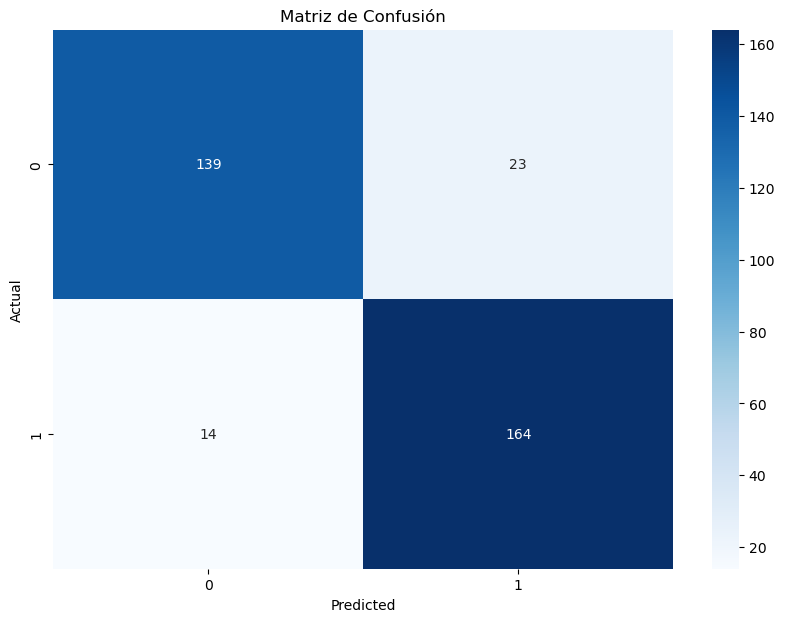

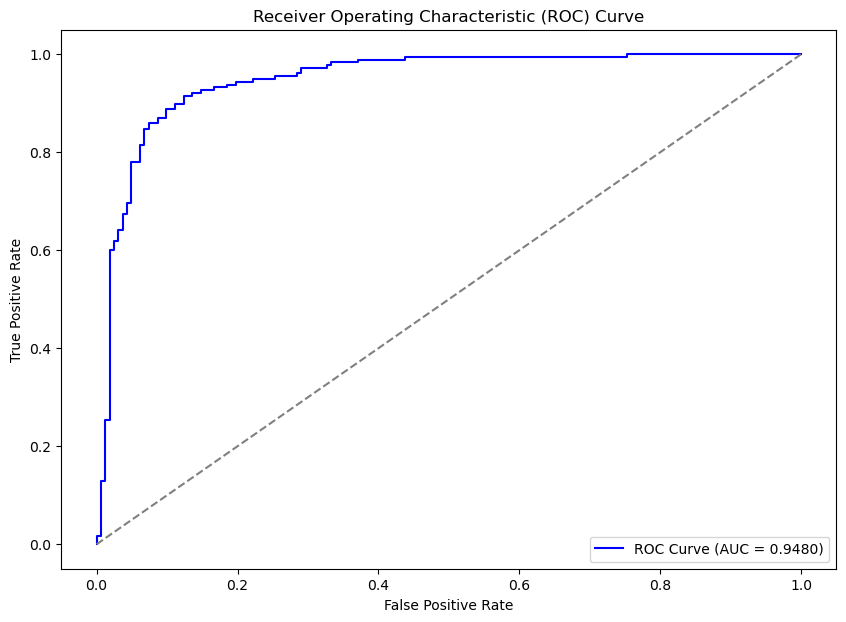

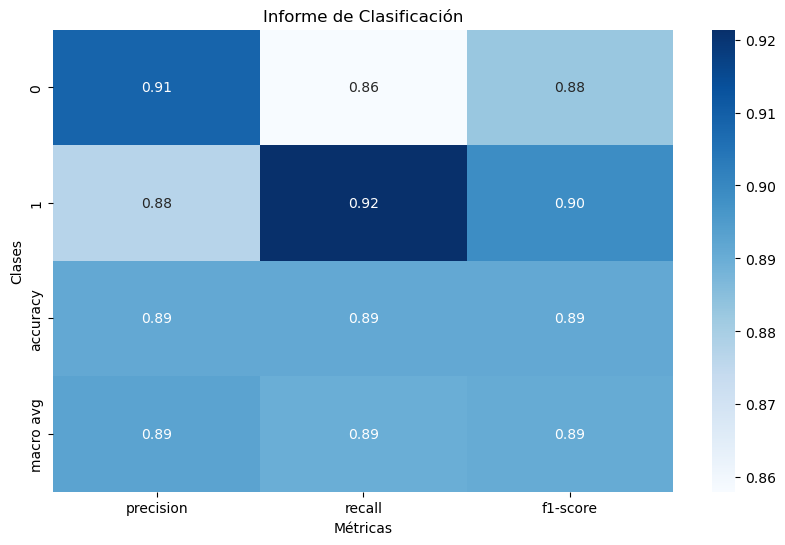

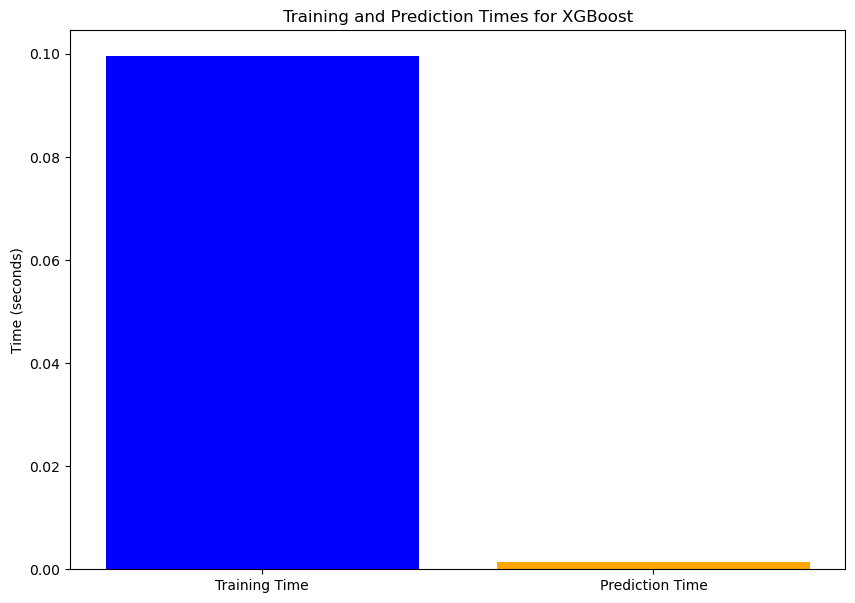

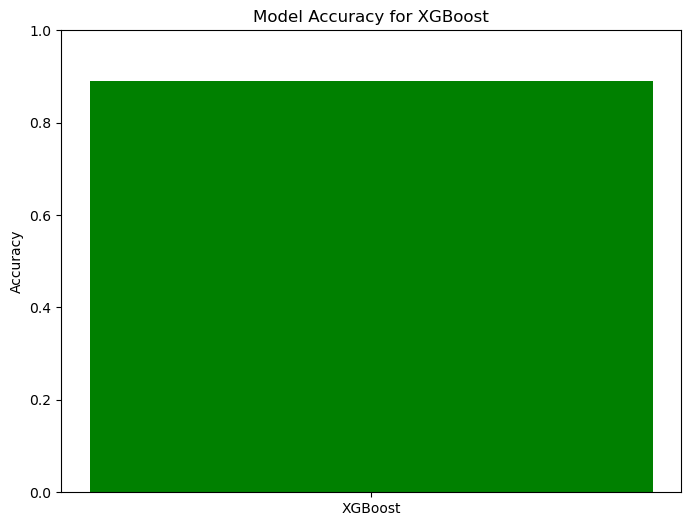

Model: XGBoost
  Training Time: 0.0996 seconds
  Prediction Time: 0.0015 seconds
  Accuracy: 0.8912


In [72]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualización de la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

# Calcular la AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Visualizar la curva ROC
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Visualización del informe de clasificación
# Generar el informe de clasificación
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Mostrar el informe en forma tabular
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f')
plt.title('Informe de Clasificación')
plt.xlabel('Métricas')
plt.ylabel('Clases')
plt.show()

# Visualización de tiempos de entrenamiento y predicción
times = {
    'Training Time': training_time,
    'Prediction Time': prediction_time
}

plt.figure(figsize=(10, 7))
plt.bar(times.keys(), times.values(), color=['blue', 'orange'])
plt.ylabel('Time (seconds)')
plt.title('Training and Prediction Times for XGBoost')
plt.show()

# Visualización de precisión
plt.figure(figsize=(8, 6))
plt.bar(['XGBoost'], [accuracy], color='green')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.title('Model Accuracy for XGBoost')
plt.show()

# Mostrar resultados en texto
print(f"Model: XGBoost")
print(f"  Training Time: {training_time:.4f} seconds")
print(f"  Prediction Time: {prediction_time:.4f} seconds")
print(f"  Accuracy: {accuracy:.4f}")


